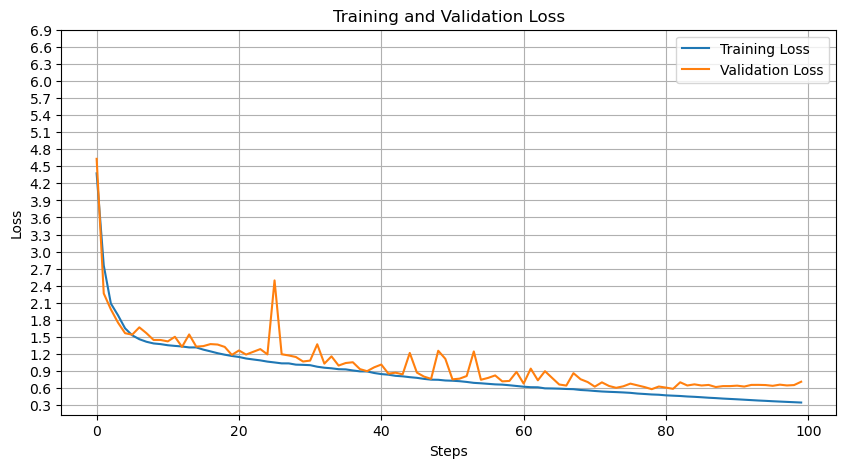

In [4]:
import os
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

import matplotlib.pyplot as plt

# Path to the tensorboard log directory
log_dir = "/home/mrcong/Code/mylab-nilm-files/nilm-physical-features/results/tensorboard/VNDALE1/MLP_1800/MLP_['Irms', 'P', 'MeanPF', 'S', 'Q']"

# Load the event accumulator
event_acc = EventAccumulator(log_dir)
event_acc.Reload()
latest_epochs = 100

# Extract the scalars
training_loss = event_acc.Scalars("Loss/Training")
validation_loss = event_acc.Scalars("Loss/Validation")

# Select the latest 100 epochs
training_loss = training_loss[-latest_epochs:]
validation_loss = validation_loss[-latest_epochs:]

# Extract the steps and values
training_steps = [x.step for x in training_loss]
training_values = [x.value for x in training_loss]
validation_steps = [x.step for x in validation_loss]
validation_values = [x.value for x in validation_loss]

# Plot the losses
plt.figure(figsize=(10, 5))
plt.plot(training_steps, training_values, label="Training Loss")
plt.plot(validation_steps, validation_values, label="Validation Loss")
plt.xlabel("Steps")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.grid(True)
plt.yticks([i * 0.3 for i in range(int(min(min(training_values), min(validation_values)) // 0.2), int(max(max(training_values), max(validation_values)) // 0.2) + 1)])
plt.show()